In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [4]:
td_filepath = r"C:\Users\npilyugina\Desktop\Repo\ml-intro\2_data_exploration\train.csv"
td = pd.read_csv(td_filepath, index_col="PassengerId")
td

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


# Context

# Data quality assessment

Checking for NA values across the dataset

<AxesSubplot:xlabel='PassengerId'>

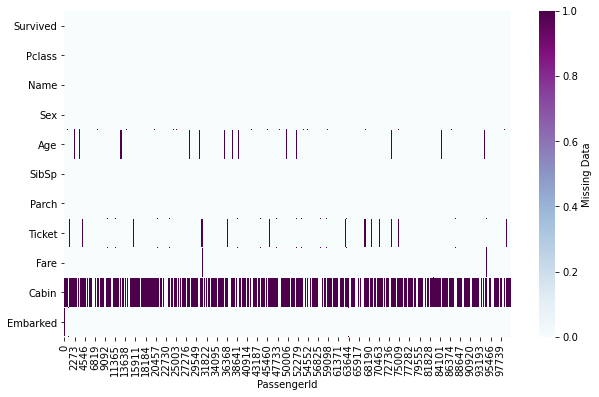

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(td.isna().transpose(),
            cmap="BuPu",
            cbar_kws={'label': 'Missing Data'})

<Figure size 720x432 with 0 Axes>

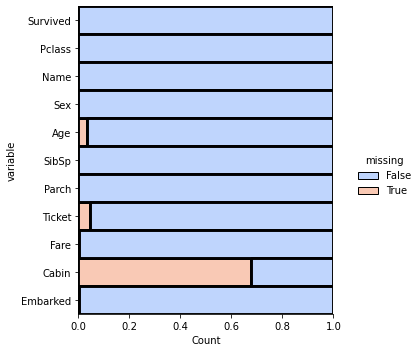

In [56]:
plt.figure(figsize=(10,6))
sns.displot(
    data=td.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    palette = sns.color_palette('Accent')[4:6],
    multiple="fill"
)

# Data exploration

Text(0.5, 1.0, 'Sex distribution')

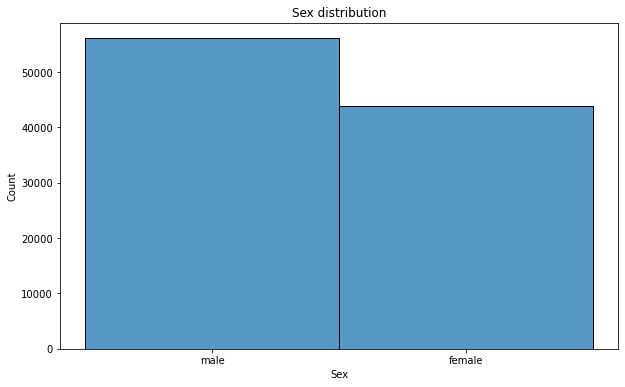

In [82]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Sex')
plt.title("Sex distribution")

Text(0.5, 1.0, 'Class distribution')

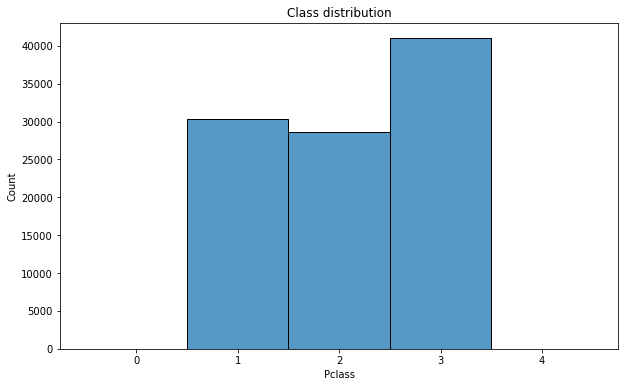

In [89]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Pclass', bins=np.arange(6)-0.5)
plt.title("Class distribution")

Text(0.5, 1.0, 'Survived distribution')

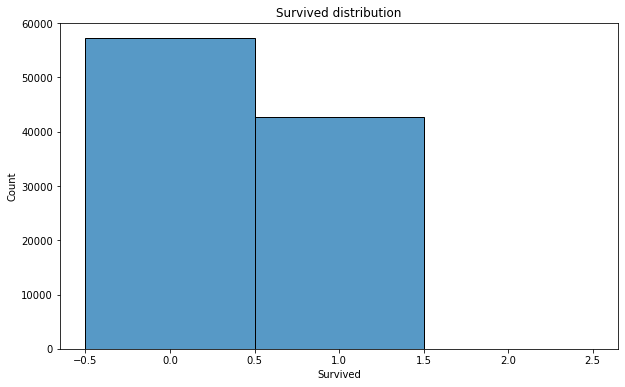

In [95]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Survived', bins=np.arange(4)-0.5)
plt.title("Survival distribution")

Text(0.5, 1.0, 'Embarked')

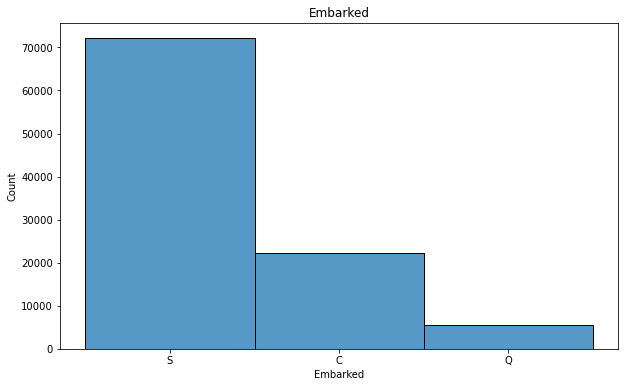

In [100]:
plt.figure(figsize=(10,6))
tdemb = td[td['Embarked'].notnull()]
sns.histplot(data=tdemb, x='Embarked')
plt.title("Port of Embarkation distribution")

# Summary